# 数据归一化
- 数据的衡量尺度不同，导致数据权重出现偏差
- 解决方案：将所有的数据映射到同一尺度

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 最值归一化（normalization）
把所有数据映射到0-1之间

$$x_{scale} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

适用于分布有明显边界的情况；受outlier影响比较大

In [2]:
x = np.random.randint(0, 100, size=100)
x

array([38, 14, 13, 62, 95, 82, 95,  1,  2, 17, 99, 91, 75, 55, 13, 70, 84,
       95, 68, 85, 12,  2, 53, 97, 29, 66, 22, 68, 89, 29, 22,  1, 17, 40,
       93, 58, 38, 62, 30, 89, 21, 34,  0, 13, 66, 13,  7, 90, 31, 67,  0,
        2, 28, 12, 44, 86, 77, 34, 34,  1, 64, 70, 99, 56, 96, 26, 49, 52,
       41, 57, 91, 34, 29, 96,  3, 30, 45, 49,  3, 22, 46, 81, 78,  7, 81,
       67, 81, 64,  0, 52, 89, 14, 85, 98, 24, 17, 56, 28, 31, 11])

In [3]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.38383838, 0.14141414, 0.13131313, 0.62626263, 0.95959596,
       0.82828283, 0.95959596, 0.01010101, 0.02020202, 0.17171717,
       1.        , 0.91919192, 0.75757576, 0.55555556, 0.13131313,
       0.70707071, 0.84848485, 0.95959596, 0.68686869, 0.85858586,
       0.12121212, 0.02020202, 0.53535354, 0.97979798, 0.29292929,
       0.66666667, 0.22222222, 0.68686869, 0.8989899 , 0.29292929,
       0.22222222, 0.01010101, 0.17171717, 0.4040404 , 0.93939394,
       0.58585859, 0.38383838, 0.62626263, 0.3030303 , 0.8989899 ,
       0.21212121, 0.34343434, 0.        , 0.13131313, 0.66666667,
       0.13131313, 0.07070707, 0.90909091, 0.31313131, 0.67676768,
       0.        , 0.02020202, 0.28282828, 0.12121212, 0.44444444,
       0.86868687, 0.77777778, 0.34343434, 0.34343434, 0.01010101,
       0.64646465, 0.70707071, 1.        , 0.56565657, 0.96969697,
       0.26262626, 0.49494949, 0.52525253, 0.41414141, 0.57575758,
       0.91919192, 0.34343434, 0.29292929, 0.96969697, 0.03030

In [4]:
X = np.random.randint(0, 100, size=(50, 2))
X = np.array(X, dtype=np.float)
X[:10,:]

array([[57., 47.],
       [33., 88.],
       [96., 58.],
       [91., 85.],
       [66.,  2.],
       [61., 74.],
       [70., 33.],
       [83., 83.],
       [ 6., 77.],
       [92., 80.]])

In [5]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))
X[:10,:]

array([[0.58947368, 0.47368421],
       [0.33684211, 0.90526316],
       [1.        , 0.58947368],
       [0.94736842, 0.87368421],
       [0.68421053, 0.        ],
       [0.63157895, 0.75789474],
       [0.72631579, 0.32631579],
       [0.86315789, 0.85263158],
       [0.05263158, 0.78947368],
       [0.95789474, 0.82105263]])

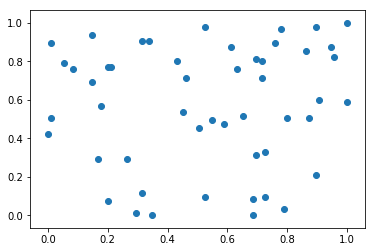

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
np.mean(X[:,0])

0.5265263157894737

In [8]:
np.std(X[:,0])

0.2965096309040173

In [9]:
np.mean(X[:,1])

0.5675789473684211

In [10]:
np.std(X[:,1])

0.3118124303002539

## 均值方差归一化（standardization）
把所有数据归一到均值为0方差为1的分布中
$$x_{scale} = \frac{x - x_{mean}}{S}$$
适用于数据分布没有明显的边界，可能存在几段数据值

In [11]:
X2 = X = np.random.randint(0, 100, size=(50, 2))

In [12]:
X2 = np.array(X2, dtype=float)

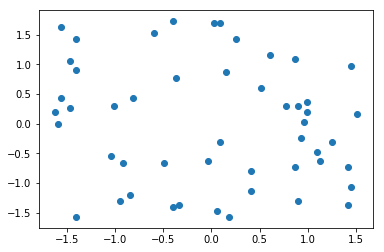

In [13]:
X2[:,0] = (X2[:,0] - np.mean(X2[:,0])) / np.std(X2[:,0])
X2[:,1] = (X2[:,1] - np.mean(X2[:,1])) / np.std(X2[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [14]:
print(np.mean(X2[:,0]))
print(np.std(X2[:,0]))
print(np.mean(X2[:,1]))
print(np.std(X2[:,1]))

4.884981308350689e-17
0.9999999999999998
8.881784197001253e-17
1.0


### 如何对测试数据集进行归一化

- 使用训练集的均值和方差来归一化测试集数据

$$x_{test\_scale} = \frac{x_{test} - x_{mean\_train}}{S_{train}}$$

**测试数据是模拟真实环境**
- 真实环境很有可能无法得到所有测试数据的均值和方差
- 对数据的归一化也是算法的一部分

**我们需要保存训练数据集得到的均值和方差**

### scikit-learn 中使用 Scaler 来归一化

In [15]:
from sklearn import datasets

In [16]:
iris = datasets.load_iris()

In [17]:
X = iris.data
y = iris.target

In [18]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

### scikit-learn 中的 StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
stdScaler = StandardScaler()

In [22]:
stdScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
stdScaler.mean_

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [24]:
stdScaler.scale_

array([0.81019502, 0.44076874, 1.76295187, 0.75429833])

In [25]:
X_train_std = stdScaler.transform(X_train)
X_test_std = stdScaler.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
kNN_clf = KNeighborsClassifier(n_neighbors=3)
kNN_clf.fit(X_train_std, y_train)
kNN_clf.score(X_test_std, y_test)

1.0